In [60]:
import pandas as pd
import geopandas as gpd
import os
import subprocess
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def get_git_root():
    try:
        root_dir = (
            subprocess.check_output(["git", "rev-parse", "--show-toplevel"])
            .strip()
            .decode("utf-8")
        )
        return root_dir
    except subprocess.CalledProcessError:
        raise Exception("This is not a Git repository")


# Get the Git repository's root directory
repo_root = get_git_root()

In [10]:
gdf=gpd.GeoDataFrame(columns=['geometry'],geometry='geometry')
gdf.set_crs(epsg=4326,inplace=True)

,geometry


In [11]:
gps_dict={
    "Senegal": ['2023','2020_2021','2019','2018','2017','2016','2015'],
    "Ghana":['2022','2019','2017','2016'],
}

In [14]:
for country, years in gps_dict.items():
    for year in years:
        file_path=os.path.join(repo_root, 'data','GPS',country,year)
        file_name=next((f for f in os.listdir(file_path) if f.endswith('.shp')),None)
        if file_name:
            gps_df=gpd.read_file(os.path.join(file_path,file_name))
            gdf=gpd.GeoDataFrame(pd.concat([gdf,gps_df],ignore_index=True))
        else:
            print(f"Could not find {country} {year}")


In [15]:
print(f"Missing latitude values in gps: {gdf['LATNUM'].isna().sum()}.")
print(f"Missing longitude values in gps: {gdf['LONGNUM'].isna().sum()}.")

Missing latitude values in gps: 0.
Missing longitude values in gps: 0.


In [44]:
DHS_dict = {
    "Senegal_Data": ["2023", "2020_2021", "2019", "2018", "2017", "2016", "2015"],
    "Ghana_Data": ["2022", "2019", "2016"],
}

In [45]:
dfs={}
for country, years in DHS_dict.items():
    for year in years:
        file_path=os.path.join(repo_root,'data','DHS',country,year)
        file_name = next((f for f in os.listdir(file_path) if f.endswith(".DTA")), None)
        if file_name:
            df=pd.read_stata(os.path.join(file_path,file_name))
            dfs[f"{country}_{year}"]=df
        else:
            print(f"Could not find {country} {year}")

In [51]:
unique_columns_list = []
for country, years in DHS_dict.items():
    for year in years:
        df=dfs[f"{country}_{year}"]
        for col in df.columns:
            normalized_col = re.sub(r"(_.*)?$", "", col)
            if normalized_col not in unique_columns_list:
                unique_columns_list.append(normalized_col)

In [62]:
columns_important = [
    "hv001",
    "hv005",
    "hv009",
    "hv014",
    "hv025",
    "hv201",
    "hv202",
    "hv201b",
    "hv204",
    "hv205",
    "hv206",
    "hv207",
    "hv208",
    "hv209",
    "hv210",
    "hv211",
    "hv212",
    "hv213",
    "hv214",
    "hv215",
    "hv216",
    "hv217",
    "hv219",
    "hv220",
    "hv221",
    "hv222",
    "hv223",
    "hv225",
    "hv226",
    "hv227",
    "hv228",
    "hv230a",
    "hv230b",
    "hv232",
    "hv232b",
    "hv232y",
    "hv234a",
    "hv235",
    "hv237",
    "hv237a",
    "hv237b",
    "hv237c",
    "hv237d",
    "hv237e",
    "hv237f",
    "hv237x",
    "hv237z",
    "hv238",
    "hv238a",
    "hv240",
    "hv241",
    "hv242",
    "hv243a",
    "hv243b",
    "hv243c",
    "hv243d",
    "hv243e",
    "hv244",
    "hv245",
    "hv246",
    "hv246a",
    "hv246b",
    "hv246c",
    "hv246d",
    "hv246e",
    "hv246f",
    "hv246g",
    "hv246h",
    "hv247",
    "hv252",
    "hv255",
    "hv256",
    "hv257",
    "hv259",
    "hv260",
    "hv261",
    "hv262",
    "hv263",
    "hml1",
    "hml2",
    "sh101a",
    "sh134a",
    "sh134b",
    "sh134c",
    "sh151aa",
    "sh151ab",
    "sh151ac",
    "sh151ad",
    "sh151ae",
    "sh151ax",
    "sh155a",
    "sh155b",
    "sh161a",
    "sh162a",
    "sh163a",
    "sh161b",
    "sh162b",
    "sh163b",
    "sh161c",
    "sh162c",
    "sh163c",
    "sh161d",
    "sh162d",
    "sh163d",
    "sh161e",
    "sh162e",
    "sh163e",
    "sh165",
    "sh166",
    "sh177a",
    "sh177b",
    "sh177c",
    "sh177d",
    "sh177e",
    "sh177f",
    "sh177g",
    "sh177h",
    "sh177i",
    "sh177j",
    "sh177k",
    "sh177l",
    "sh177x",
    "sh132d",
    "sh132e",
    "sh132h",
    "sh132j",
    "sh132k",
    "sh132l",
    "sh132m",
    "sh132o",
    "sh132p",
    "sh133c",
    "sh133f",
    "sh133g",
    "sh133h",
]

In [53]:
missing_columns_dict = {}
for country, years in DHS_dict.items():
    for year in years:
        df = dfs[f"{country}_{year}"]
        df_columns_normalized = [re.sub(r'(_.*)?$', '', col) for col in df.columns]
        
        # Initialize the list for missing columns for this specific df
        missing_columns = []

        # Check if each column in unique_columns_list exists in the dataframe (normalized)
        for col in columns_important:  # Normalize the column name from the unique list
            if col not in df_columns_normalized:
                missing_columns.append(col)  # Add to missing_columns if not found

        missing_columns_dict[f"{country}_{year}"] = missing_columns

In [54]:
missing_columns2_dict = {}
for country, years in DHS_dict.items():
    for year in years:
        df = dfs[f"{country}_{year}"]
        df_columns_normalized = [re.sub(r"(_.*)?$", "", col) for col in df.columns]

        # Initialize the list for missing columns for this specific df
        missing_columns = []

        # Check if each column in unique_columns_list exists in the dataframe (normalized)
        for col in unique_columns_list:  # Normalize the column name from the unique list
            if col not in df_columns_normalized:
                missing_columns.append(col)  # Add to missing_columns if not found

        missing_columns2_dict[f"{country}_{year}"] = missing_columns

In [ ]:
missing_columns2_dict

In [55]:
overlapping_columns = {}
columns_important_overlap=columns_important
for country, years in DHS_dict.items():
    for year in years:
        df = dfs[f"{country}_{year}"]
        df_columns_normalized = [re.sub(r"(_.*)?$", "", col) for col in df.columns]

        # Check if each column in unique_columns_list exists in the dataframe (normalized)
        for col in columns_important_overlap:  # Normalize the column name from the unique list
            if col not in df_columns_normalized:
                columns_important_overlap.remove(col)

In [ ]:
columns_important_overlap

In [ ]:
columns_important

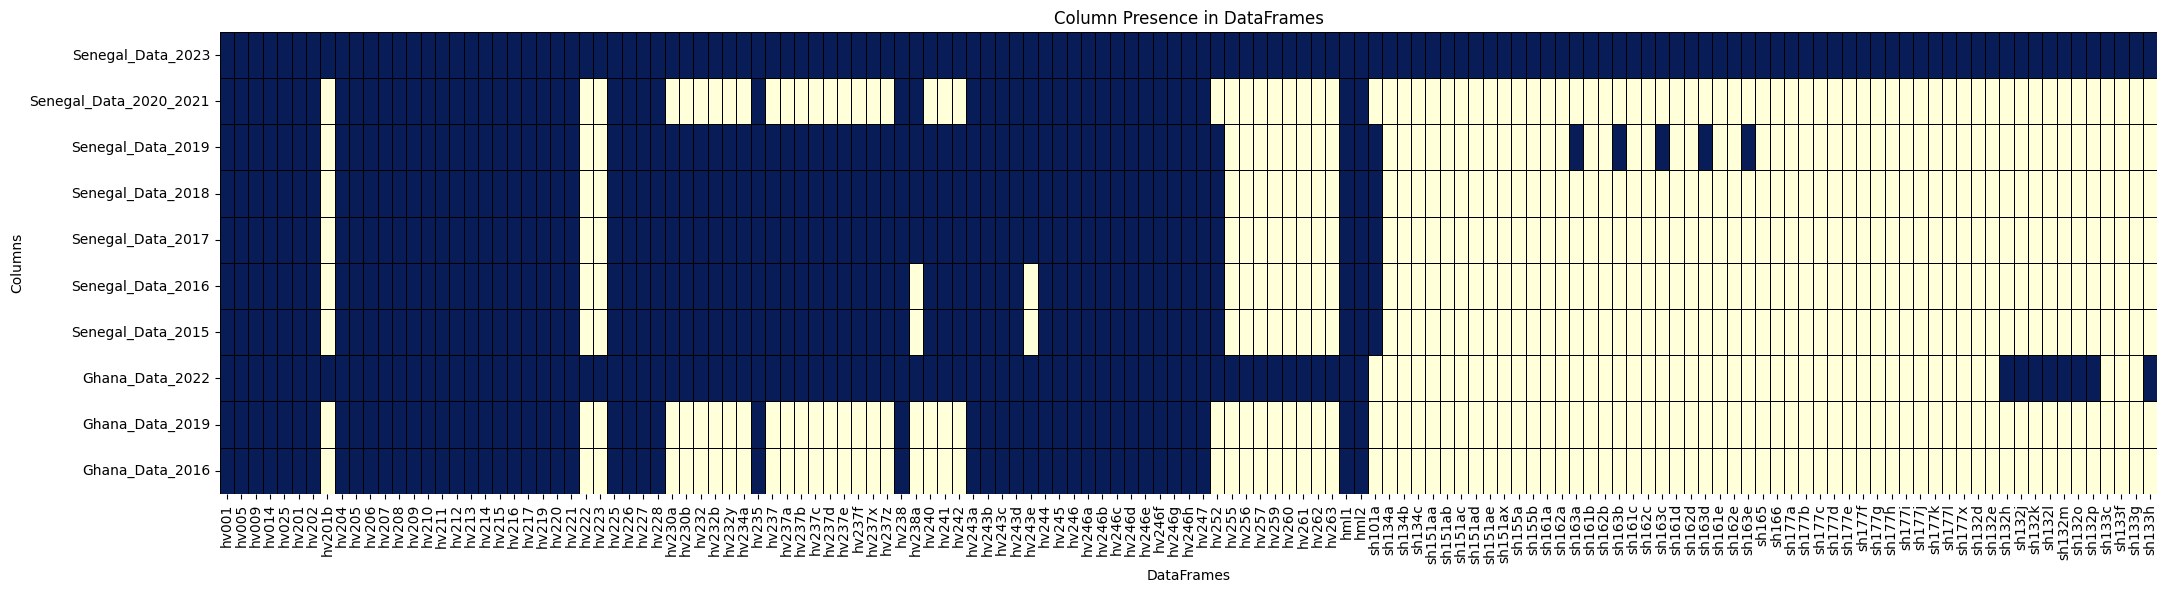

In [72]:
heatmap_data = {col: [] for col in columns_important}

# Loop through each dataframe in dfs
for country, years in DHS_dict.items():
    for year in years:
        df = dfs[f"{country}_{year}"]

        # For each column in columns_important, check if it exists in the dataframe
        for col in columns_important:
            normalized_col = re.sub(r"(_.*)?$", "", col)  # Normalize the column name
            if normalized_col in df.columns:
                heatmap_data[col].append(1)  # 1 if column exists
            else:
                heatmap_data[col].append(0)  # 0 if column does not exist

# Convert the heatmap_data dictionary into a pandas DataFrame
# The columns are 'columns_important' and the index will be the 'country_year' combinations
heatmap_df = pd.DataFrame(
    heatmap_data,
    index=[
        f"{country}_{year}" for country, years in DHS_dict.items() for year in years
    ],
)

# Plot the heatmap
plt.figure(figsize=(25, 6))
sns.heatmap(
    heatmap_df,
    cmap="YlGnBu",
    cbar=False,
    annot=False,
    fmt="d",
    xticklabels=True,
    yticklabels=True,
    linewidths=0.5,
    linecolor="black",
)
plt.title("Column Presence in DataFrames")
plt.xlabel("DataFrames")
plt.ylabel("Columns")
plt.show()